In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [61]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [62]:
traindf=pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
traindf.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [63]:
testdf=pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
testdf.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [64]:
traindf.shape

(7613, 5)

In [65]:
testdf.shape

(3263, 4)

In [66]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [67]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [68]:
traindf.drop('location',axis='columns',inplace=True)
traindf

,id,keyword,text,target
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,10869,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,Police investigating after an e-bike collided ...,1


In [69]:
testdf.drop('location',axis='columns',inplace=True)
testdf

,id,keyword,text
0,0,NaN,Just happened a terrible car crash
1,2,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...
3258,10861,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


Text(0, 0.5, 'samples')

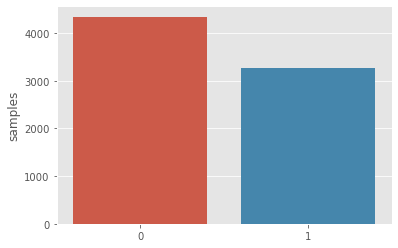

In [70]:
plt.style.use('ggplot')
import seaborn as sns
x = traindf.target.value_counts()

sns.barplot(x.index,x)
plt.pyplot.gca().set_ylabel('samples')

Target have 2 classes ,class 0 is Non disaster is more than class 1 disaster

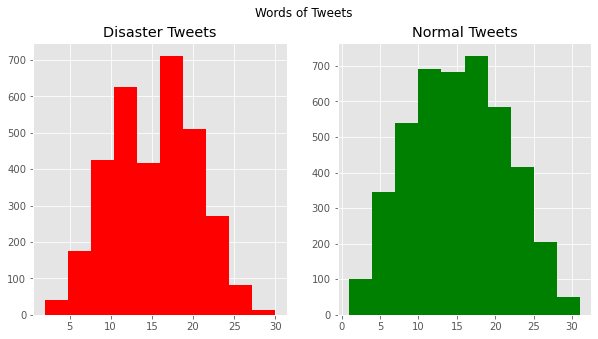

In [71]:
fig,(ax1,ax2) =plt.pyplot.subplots(1,2,figsize =(10,5))
tweet_len = traindf[traindf['target'] ==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('Disaster Tweets')
tweet_len =traindf[traindf['target'] ==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Normal Tweets')
fig.suptitle('Words of Tweets')
plt.pyplot.show()

In [72]:
traindf['textlength']=traindf['text'].apply(lambda x:len(x))
traindf.head()

,id,keyword,text,target,textlength
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


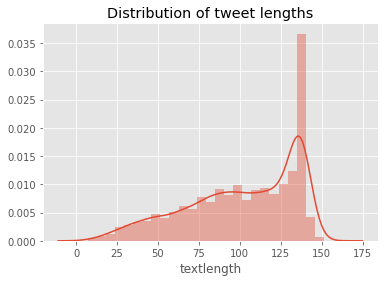

In [73]:
textlength_plot=sns.distplot(traindf['textlength']).set_title('Distribution of tweet lengths');
plt.pyplot.grid(True)

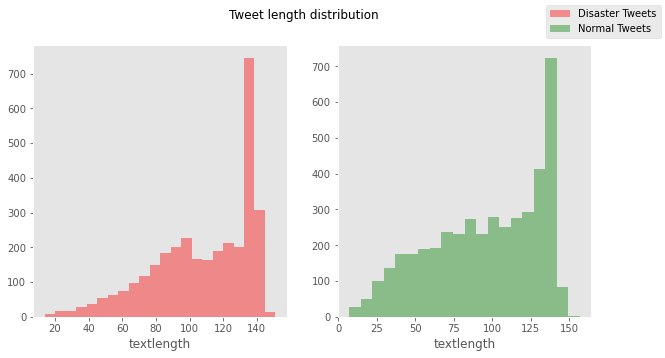

In [74]:
fig,(ax1,ax2) =plt.pyplot.subplots(1,2,figsize =(10,5))
sns.distplot(traindf[(traindf['target']==1)]['textlength'],ax=ax1,kde=False,color='red',label='Disaster Tweets')
sns.distplot(traindf[(traindf['target']==0)]['textlength'],ax=ax2,kde=False,color='green',label='Normal Tweets')
fig.suptitle('Tweet length distribution')
fig.legend(loc='upper right')
ax1.grid()
ax2.grid()
plt.pyplot.show()

In [75]:
#A disaster tweet text
traindf[traindf['target']==1]['text'][10:20]

10          Three people died from the heat wave so far
11    Haha South Tampa is getting flooded hah- WAIT ...
12    #raining #flooding #Florida #TampaBay #Tampa 1...
13              #Flood in Bago Myanmar #We arrived Bago
14    Damage to school bus on 80 in multi car crash ...
31    @bbcmtd Wholesale Markets ablaze http://t.co/l...
33    #AFRICANBAZE: Breaking news:Nigeria flag set a...
37    INEC Office in Abia Set Ablaze - http://t.co/3...
38    Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...
46    How the West was burned: Thousands of wildfire...
Name: text, dtype: object

In [76]:
#A non disaster tweet text
traindf[traindf['target']==0]['text'][10:20]

25                       No way...I can't eat that shit
26                                Was in NYC last week!
27                                   Love my girlfriend
28                                            Cooool :)
29                                   Do you like pasta?
30                                             The end!
32    We always try to bring the heavy. #metal #RT h...
34                   Crying out for more! Set me ablaze
35    On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
36    @PhDSquares #mufc they've built so much hype a...
Name: text, dtype: object

**Data pre processing**

data cleaning:- Before starting any NLP project, 
text data needs to be pre processed to convert it into in a consistent format.
Text will be cleaned, tokenized and converted into a matrix.

Some of the basic text per-processing techniques includes:
* Make text all lower or uppercase:-Algorithms does not treat the same word different in different cases.
* Removing Noise:-Everything in the text that isn’t a standard number or letter i.e. Punctuation, Numerical values,etc.
* Tokenization:-Tokenization is just the term used to describe the process of converting the normal text strings into a list of tokens i.e.
* Stopword Removal:-Sometimes, some extremely common words which would appear to be of little value in helping select documents matching a user need are excluded from the vocabulary entirely. 
* Stemming:- it is the process of reducing inflected (or sometimes derived) words to their stem, base or root form — generally a written word form.
* Lemmatization:-The major difference between these is, that, stemming can often create non-existent words, whereas lemmas are actual words.


In [77]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [78]:
def clean_text(text):
    
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [79]:
traindf['text']=traindf['text'].apply(lambda x:clean_text(x))
testdf['text']=testdf['text'].apply(lambda x:clean_text(x))

In [80]:
traindf['text'].head()

0    Our Deeds are the Reason of this earthquake Ma...
1                Forest fire near La Ronge Sask Canada
2    All residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    Just got sent this photo from Ruby Alaska as s...
Name: text, dtype: object

In [81]:
testdf['text'].head()

0                   Just happened a terrible car crash
1    Heard about earthquake is different cities sta...
2    there is a forest fire at spot pond geese are ...
3                Apocalypse lighting Spokane wildfires
4          Typhoon Soudelor kills  in China and Taiwan
Name: text, dtype: object

In [82]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
traindf['text'] = traindf['text'].apply(lambda x: tokenizer.tokenize(x))
testdf['text'] = testdf['text'].apply(lambda x: tokenizer.tokenize(x))

In [83]:
traindf['text'].head()

0    [Our, Deeds, are, the, Reason, of, this, earth...
1        [Forest, fire, near, La, Ronge, Sask, Canada]
2    [All, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [Just, got, sent, this, photo, from, Ruby, Ala...
Name: text, dtype: object

In [84]:
testdf['text'].head()

0            [Just, happened, a, terrible, car, crash]
1    [Heard, about, earthquake, is, different, citi...
2    [there, is, a, forest, fire, at, spot, pond, g...
3           [Apocalypse, lighting, Spokane, wildfires]
4    [Typhoon, Soudelor, kills, in, China, and, Tai...
Name: text, dtype: object

In [85]:
def remove_stopwords(text):
    """
    Removing stopwords belonging to english language
    
    """
    words = [w for w in text if w not in stopwords.words('english')]
    return words

traindf['text'] = traindf['text'].apply(lambda x : remove_stopwords(x))
testdf['text'] = testdf['text'].apply(lambda x : remove_stopwords(x))

In [86]:
traindf['text'].head()

0    [Our, Deeds, Reason, earthquake, May, ALLAH, F...
1        [Forest, fire, near, La, Ronge, Sask, Canada]
2    [All, residents, asked, shelter, place, notifi...
3    [people, receive, wildfires, evacuation, order...
4    [Just, got, sent, photo, Ruby, Alaska, smoke, ...
Name: text, dtype: object

In [87]:
testdf['text'].head()

0               [Just, happened, terrible, car, crash]
1    [Heard, earthquake, different, cities, stay, s...
2    [forest, fire, spot, pond, geese, fleeing, acr...
3           [Apocalypse, lighting, Spokane, wildfires]
4            [Typhoon, Soudelor, kills, China, Taiwan]
Name: text, dtype: object

In [88]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

traindf['text'] = traindf['text'].apply(lambda x : combine_text(x))
testdf['text'] = testdf['text'].apply(lambda x : combine_text(x))

In [89]:
traindf['text'].head()

0     Our Deeds Reason earthquake May ALLAH Forgive us
1                Forest fire near La Ronge Sask Canada
2    All residents asked shelter place notified off...
3    people receive wildfires evacuation orders Cal...
4    Just got sent photo Ruby Alaska smoke wildfire...
Name: text, dtype: object

In [90]:
testdf['text'].head()

0                     Just happened terrible car crash
1    Heard earthquake different cities stay safe ev...
2    forest fire spot pond geese fleeing across str...
3                Apocalypse lighting Spokane wildfires
4                  Typhoon Soudelor kills China Taiwan
Name: text, dtype: object

In [91]:
traindf.head()

,id,keyword,text,target,textlength
0,1,NaN,Our Deeds Reason earthquake May ALLAH Forgive us,1,69
1,4,NaN,Forest fire near La Ronge Sask Canada,1,38
2,5,NaN,All residents asked shelter place notified off...,1,133
3,6,NaN,people receive wildfires evacuation orders Cal...,1,65
4,7,NaN,Just got sent photo Ruby Alaska smoke wildfire...,1,88


In [92]:
testdf.head()

,id,keyword,text
0,0,NaN,Just happened terrible car crash
1,2,NaN,Heard earthquake different cities stay safe ev...
2,3,NaN,forest fire spot pond geese fleeing across str...
3,9,NaN,Apocalypse lighting Spokane wildfires
4,11,NaN,Typhoon Soudelor kills China Taiwan


****Vectorization of pre processed text****
* Pre process text needs to be transformed into a vector matrix of numbers before a machine learning model can understand it and learn from it.This can be done by a number of techniques:
**Bag of Words — Countvectorizer Features**
* Countvectorizer converts a collection of text documents to a matrix of token counts. It is important to note that CountVectorizer comes with a lot of options to automatically do pre processing, tokenization, and stop word removal. However, all the pre processing of the text has already been performed by creating a function.Only vanilla version of Countvectorizer will be used.
**TFIDF Features**
* A problem with the bag of words approach is that highly frequent words start to dominate in the document (e.g. larger score) but may not contain as much “informational content” this will lead to more weight to longer documents than shorter documents.To avoid that, one approach is to re-scale the frequency of words by how often they appear in all documents so that the scores for frequent words like “the” that are also frequent across all documents are penalized. This approach to scoring is called “Term Frequency-Inverse Document Frequency”, or TF-IDF for short.
1. erm Frequency: is a scoring of the frequency of the word in the current document.:- TF = (Number of times term t appears in a document)/(Number of terms in the document)
2. Inverse Document Frequency: is a scoring of how rare the word is across documents.:- IDF = 1+log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.


Let’s vectorize train and test data using count vectorizer and TFIDF:

In [93]:

from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

count_vectorizer = CountVectorizer()
train_df_vectors = count_vectorizer.fit_transform(traindf['text'])
test_df_vectors = count_vectorizer.transform(testdf["text"])

## Keeping only non-zero elements to preserve space 
print(train_df_vectors[0].todense())
print('')
print(test_df_vectors[0].todense())

[[0 0 0 ... 0 0 0]]

[[0 0 0 ... 0 0 0]]


In [94]:
# TFIDF Features (Term Frequency-Inverse Document Frequency, or TF-IDF for short)

tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
train_df_tfidf = tfidf.fit_transform(traindf['text'])
test_df_tfidf = tfidf.transform(testdf["text"])
print(train_df_tfidf[0])
print("")
print(test_df_tfidf[0])

  (0, 6243)	0.39302421847501506
  (0, 10714)	0.22584093043879028
  (0, 3849)	0.40624607293280246
  (0, 235)	0.35575390405168045
  (0, 6242)	0.25201665053237415
  (0, 2984)	0.281784213637219
  (0, 8176)	0.31905452806055357
  (0, 2490)	0.40624607293280246
  (0, 7280)	0.3052617351705585

  (0, 9878)	0.5511312156769361
  (0, 5392)	0.4146574873697291
  (0, 4412)	0.49046581171299314
  (0, 2218)	0.36859515913200974
  (0, 1543)	0.38457047140914075


**Build a Machine Learning model**
* create a simple classification model using commonly used classification algorithms and check how the model performs.
* Split the ‘train’ data set into train and ‘test’ data for fitting the model using count vectorizer and TFIDF:

In [95]:
from sklearn.linear_model import LogisticRegression
# Fitting a simple Logistic Regression on Counts
clf_log = LogisticRegression(C=1.0)
scores = model_selection.cross_val_score(clf_log, train_df_vectors, traindf["target"], cv=5, scoring="f1")
scores

array([0.59980898, 0.50301464, 0.57311919, 0.58951175, 0.69085174])

In [96]:
clf_log.fit(train_df_vectors, traindf["target"])

LogisticRegression()

In [97]:
# Fitting a simple Logistic Regression on TFIDF

clf_tfidf = LogisticRegression(C=1.0)
scores = model_selection.cross_val_score(clf_tfidf, train_df_tfidf, traindf["target"], cv=5, scoring="f1")
scores

array([0.56646217, 0.5004686 , 0.54730983, 0.51612903, 0.64946619])

In [98]:
# Fitting a simple Naive Bayes on Counts
from sklearn.naive_bayes import MultinomialNB
clf_NB = MultinomialNB()
scores = model_selection.cross_val_score(clf_NB, train_df_vectors, traindf["target"], cv=5, scoring="f1")
scores

array([0.62896315, 0.61672727, 0.67148014, 0.64728987, 0.72108844])

In [99]:
clf_NB.fit(train_df_vectors, traindf["target"])

MultinomialNB()

In [100]:
# Fitting a simple Naive Bayes on TFIDF

clf_NB_TFIDF = MultinomialNB()
scores = model_selection.cross_val_score(clf_NB_TFIDF, train_df_tfidf, traindf["target"], cv=5, scoring="f1")
scores

array([0.57285429, 0.57321429, 0.61347518, 0.59439252, 0.73709677])

In [101]:

clf_NB_TFIDF.fit(train_df_tfidf, traindf["target"])

MultinomialNB()

In [106]:
# Fitting a simple SVC on Counts
from sklearn.svm import SVC
clf_SVC=SVC(random_state=2020, C=1.7)
scores = model_selection.cross_val_score(clf_SVC, train_df_vectors, traindf["target"], cv=5, scoring="f1")
scores

array([0.59049545, 0.49345794, 0.57446809, 0.54330709, 0.68263473])

In [107]:
# Fitting a simple Naive Bayes on TFIDF
clf_SVC_TFIDF=SVC(random_state=2020, C=1.7)
scores = model_selection.cross_val_score(clf_SVC_TFIDF, train_df_tfidf, traindf["target"], cv=5, scoring="f1")
scores

array([0.57398213, 0.4797048 , 0.52850679, 0.46060606, 0.64298094])

In [102]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(
    traindf["text"], traindf["target"], test_size=0.2, random_state=2020)

vectorizer = TfidfVectorizer(decode_error="ignore", ngram_range=(1,2), 
    smooth_idf=False, sublinear_tf=True, use_idf=True)

x_train_tfidf = vectorizer.fit_transform(x_train)
x_valid_tfidf = vectorizer.transform(x_valid)

model = SVC(random_state=2020, C=1.7)
model.fit(x_train_tfidf, y_train)

train_predictions = model.predict(x_valid_tfidf)
    
print(classification_report(y_valid, train_predictions, target_names=["Not Real", "Real"]))
score = model.score(x_valid_tfidf, y_valid)
print("--> Mean accuracy {:0.5}".format(score))
print("")

              precision    recall  f1-score   support

    Not Real       0.79      0.89      0.84       849
        Real       0.84      0.70      0.76       674

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523

--> Mean accuracy 0.80827



Building and submitting the final model

In [103]:
vectorizer = TfidfVectorizer(
    decode_error="ignore", 
    ngram_range=(1,2), 
    smooth_idf=False, 
    sublinear_tf=True, 
    use_idf=True
)
train_tfidf = vectorizer.fit_transform(traindf["text"])
model = SVC(random_state=2020, C=1.7)
model.fit(train_tfidf, traindf["target"])

SVC(C=1.7, random_state=2020)